In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Use of pandas library to read the data from the csv dataset for the properties of different houses in london

In [12]:
houses = pd.read_csv("London Property Listings Dataset.csv")

In [21]:
houses.head(10)

,Price,Property Type,Bedrooms,Bathrooms,Size,Postcode,Area,Price_Category,Area_Avg_Price
0,330000.0,Apartment,1.0,1.0,518.000000,E14,Eastern,Low,1.001684e+06
1,340000.0,Flat,1.0,1.0,887.498269,E14,Eastern,Low,1.001684e+06
2,340000.0,Apartment,1.0,1.0,934.569040,E14,Eastern,Low,1.001684e+06
3,340000.0,Flat,1.0,1.0,887.498269,E14,Eastern,Low,1.001684e+06
4,340000.0,Flat,1.0,1.0,388.000000,SW20,South Western,Low,1.516724e+06
5,340000.0,Apartment,2.0,1.0,230.000000,WC1N,Western Central,Low,1.625819e+06
6,340000.0,Flat,1.0,1.0,465.000000,E14,Eastern,Low,1.001684e+06
7,340000.0,Apartment,2.0,1.0,934.569040,SE18,South Eastern,Low,6.921048e+05
8,340000.0,Flat,2.0,2.0,665.000000,E14,Eastern,Low,1.001684e+06
9,340000.0,Apartment,2.0,1.0,934.569040,E14,Eastern,Low,1.001684e+06


In [9]:
print(houses.isna().sum().sort_values())

Price             0
Property Type     0
Bedrooms          0
Bathrooms         0
Size              0
Postcode          0
Area              0
Price_Category    0
Area_Avg_Price    0
dtype: int64


In [53]:
#houses = pd.get_dummies(houses, columns=['Property Type', 'Area', 'Price_Category'], drop_first=True)

houses.drop(['Postcode'], axis=1, inplace=True)
print(houses.columns)

Index(['Price', 'Bedrooms', 'Bathrooms', 'Size', 'Area_Avg_Price',
       'Property Type_Flat', 'Property Type_House',
       'Property Type_Semi-Detached', 'Property Type_Terraced', 'Area_Croydon',
       'Area_Eastern', 'Area_Eastern Central', 'Area_Enfield', 'Area_Harrow',
       'Area_Ilford', 'Area_Kingston', 'Area_Kingston upon Thames',
       'Area_North Western', 'Area_Northern', 'Area_South Eastern',
       'Area_South Western', 'Area_Sutton', 'Area_Twickenham',
       'Area_Western Central', 'Area_Western and Paddington',
       'Price_Category_Low', 'Price_Category_Luxury', 'Price_Category_Medium'],
      dtype='object')


#### Get the x and y values from the dataset
##### x values are all of the properties excluding price 
##### y values are all of the price values

In [54]:
xlabel = houses.drop('Price', axis=1)
ylabel = houses["Price"]

#ylabel = ylabel.reshape(-1, 1)

print(xlabel.shape, ylabel.shape)


(29537, 27) (29537,)


#### Split the x and y values into training and testing data
##### 80% of data is training data whereas 20% is testing data
##### Random state controls the shuffling applied to data before the split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(xlabel, ylabel, test_size=0.2, random_state=42)


In [56]:
print(X_train, y_train)

       Bedrooms  Bathrooms  ...  Price_Category_Luxury  Price_Category_Medium
15656       3.0        2.0  ...                  False                   True
25378       1.0        1.0  ...                  False                   True
17693       4.0        1.0  ...                  False                  False
22727       5.0        3.0  ...                   True                  False
22510       4.0        4.0  ...                   True                  False
...         ...        ...  ...                    ...                    ...
21575       2.0        2.0  ...                   True                  False
5390        1.0        1.0  ...                  False                  False
860         1.0        1.0  ...                  False                  False
15795       2.0        2.0  ...                  False                   True
23654       1.0        1.0  ...                  False                   True

[23629 rows x 27 columns] 15656    1050000.0
25378     650000.0

In [57]:
print(X_test, y_test)

       Bedrooms  Bathrooms  ...  Price_Category_Luxury  Price_Category_Medium
16143       5.0        3.0  ...                  False                   True
27866       2.0        2.0  ...                  False                   True
24218       2.0        2.0  ...                  False                   True
15113       2.0        3.0  ...                  False                   True
3383        1.0        1.0  ...                  False                  False
...         ...        ...  ...                    ...                    ...
23643       2.0        1.0  ...                  False                   True
26896       5.0        2.0  ...                  False                   True
28879       2.0        1.0  ...                  False                   True
4338        2.0        1.0  ...                  False                  False
26100       2.0        1.0  ...                  False                   True

[5908 rows x 27 columns] 16143    1100000.0
27866     725000.0


### Time to fit the training data to the linear regression model

In [58]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Gets the predicted price using the X test data with the model
#### Calculates the mean squared error and R squared value

In [66]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R2 value: {r2}')
print(f'MSE value: {mse}')

R2 value: 0.8209404068831356
MSE value: 133425715531.16774


Index(['Bedrooms', 'Bathrooms', 'Size', 'Area_Avg_Price', 'Property Type_Flat',
       'Property Type_House', 'Property Type_Semi-Detached',
       'Property Type_Terraced', 'Area_Croydon', 'Area_Eastern',
       'Area_Eastern Central', 'Area_Enfield', 'Area_Harrow', 'Area_Ilford',
       'Area_Kingston', 'Area_Kingston upon Thames', 'Area_North Western',
       'Area_Northern', 'Area_South Eastern', 'Area_South Western',
       'Area_Sutton', 'Area_Twickenham', 'Area_Western Central',
       'Area_Western and Paddington', 'Price_Category_Low',
       'Price_Category_Luxury', 'Price_Category_Medium'],
      dtype='object')


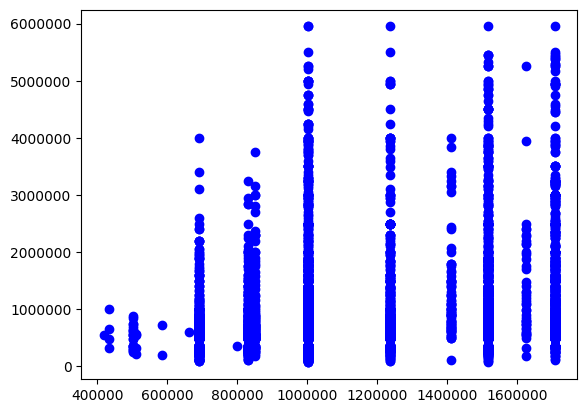

In [76]:
print(X_test.columns)

plt.ticklabel_format(style='plain')
plt.scatter(X_test['Area_Avg_Price'], y_test, c='blue')